# Agglomerative Clustering

Dalam Unsupervised learning, dalam melakukan clustering tedapat dua metode yaitu secara hirarki (hierarchical) dan non-hirarki. Agglomerative Clustering merupakan salah satu metode hirarki, dimana hasil pengelompokannya dalam bentuk konstruksi hirarki seperti struktur pohon (dendrogram). Pembuatan Dendrogram menggunakan similarity matrix untuk mengelompokan antar data yang memiliki kemiripan terdekat menggunakan rumus euclidian distance. Agglomerative akan melakukan clsutering dari n cluster menjadi satu kesatuan cluster (bottom to up), dimana n adalah banyak data.

Berikut Tahapan Agglomerative
- menghitung matriks jarak antar data menggunakan euclidian distance
- menggabungkan dua cluster terdekat
- memperbaharui matriks jarak antar dara untuk merepresentasikan antara cluster baru yang masih tersisa
- ulangi langkah 2 dan 3 hingga hanya satu culster 
- membuat dendrogram



## 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Membaca Dataset

In [3]:
df = pd.read_csv("dataset/wine-clustering.csv")

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 3. Data Pre-Processing 

### 3.1 Check Null Values`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### 3.2 Exploratory Data Analysis

<Axes: >

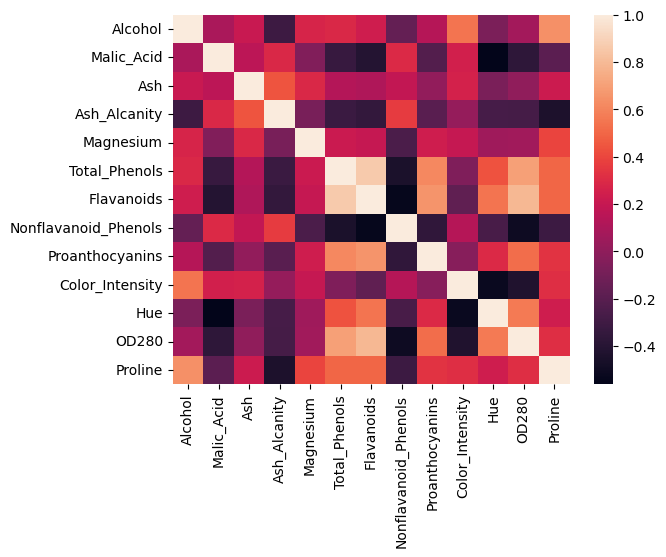

In [7]:
df.corr()
sns.heatmap(df.corr())

In [8]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## 4. Scaling Data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sdf = scaler.fit_transform(df)

In [10]:
sdf2 = pd.DataFrame(sdf)

In [11]:
sdf2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 5. Visualisasi Dendrograms

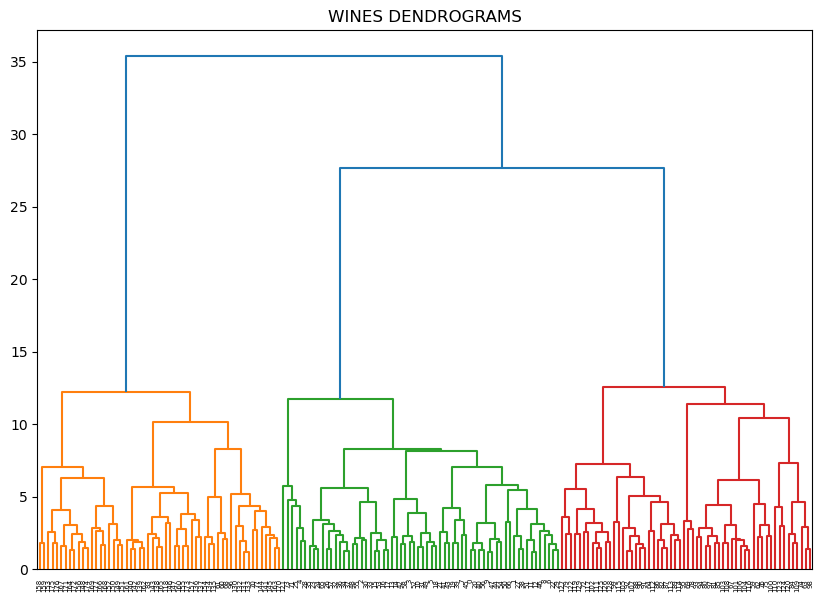

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("WINES DENDROGRAMS")
dend = shc.dendrogram(shc.linkage(sdf2, method='ward'))

## 6. Pemodelan Clustering 

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
types = cluster.fit_predict(sdf2)

In [15]:
types

array([1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 0, 7, 2, 3, 1,
       1, 7, 0, 6, 0, 5, 3, 5, 2, 7, 7, 0, 6, 3, 7, 7, 3, 0, 2, 7, 3, 3,
       3, 3, 3, 3, 3, 7, 7, 6, 0, 7, 2, 3, 7, 7, 3, 7, 7, 3, 7, 3, 7, 2,
       2, 3, 3, 3, 3, 3, 7, 3, 0, 3, 2, 5, 3, 2, 2, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4,
       4, 4], dtype=int64)

In [16]:
sdf3 = pd.DataFrame(types)

In [17]:
result_df = pd.concat([sdf3, sdf2], axis=1)

In [18]:
result_df

,0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,5,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,4,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,4,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,4,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 7. Uji Peforma Clustering 

In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(result_df, types)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3514653381003064


## Kelebihan dan Kekurangan Agglomerative Clustering 

### Kelebihan

- tidak perlu menentukan jumlah cluster sebelumnya seperti K-Means Clustering, kita dapat melihat dendrogram dan memutuskan jumlah cluster berdasarkan skenario data 
- mampu mengatasi kekurangan K-Means seperti kemampuan yang lebih baik ketika mengatasi data outlier, data berdimensi tinggi
- mudah dijelaskan, ini adalah salah satu manfaat utama yang ditawarkan algoritma ini. Dengan dendogram dapat memvisualisasikan setiap penggabungan titik data.

### Kekurangan 

- untuk data berukuran besar komputasinya cukup berat
